### Dataset Overview
- The dataset contains health-related variables, including **Physical Activity**, **Heart Disease**, and other potential confounders like **Age**, **Smoking**, and **BMI**.
- We checked for missing values and found none, which ensures the dataset is clean and ready for analysis.
- Key variables include:
  - **HeartDisease:** The target variable (outcome).
  - **PhysicalActivity:** The treatment variable.
  - **Smoking, AgeCategory, BMI, etc.:** Potential confounders to be controlled in the analysis.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/asrit/Downloads/heart_2020_cleaned.csv/heart_2020_cleaned.csv')

# Display the first few rows
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

### Summary Statistics for Continuous Variables
- This table provides descriptive statistics for key continuous variables:
  - **BMI:** Reflects body mass index and is a known risk factor for heart disease.
  - **PhysicalHealth:** Number of days in the past month with poor physical health, which may influence physical activity levels.
  - **MentalHealth:** Number of days in the past month with poor mental health, which may indirectly affect physical activity.
  - **SleepTime:** Average hours of sleep per day, a potential confounder for heart disease risk.

- Observations:
  - The average BMI (~28) suggests that many individuals are overweight.
  - Poor physical and mental health (averages ~3 days/month) indicate that health issues are common.
  - Sleep time averages about 7 hours, aligning with general health recommendations.

- **Relevance to Question:**
  - These variables, especially BMI and PhysicalHealth, could confound the relationship between physical activity and heart disease.


In [2]:
# Summary statistics for continuous variables
continuous_summary = {
    'Variable': [],
    'Mean': [],
    'Median': [],
    'Mode': [],
    'Min': [],
    'Max': [],
}

for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']:
    continuous_summary['Variable'].append(col)
    continuous_summary['Mean'].append(df[col].mean())
    continuous_summary['Median'].append(df[col].median())
    continuous_summary['Mode'].append(df[col].mode()[0])
    continuous_summary['Min'].append(df[col].min())
    continuous_summary['Max'].append(df[col].max())

continuous_summary_df = pd.DataFrame(continuous_summary)
print(continuous_summary_df)


         Variable       Mean  Median   Mode    Min    Max
0             BMI  28.325399   27.34  26.63  12.02  94.85
1  PhysicalHealth   3.371710    0.00   0.00   0.00  30.00
2    MentalHealth   3.898366    0.00   0.00   0.00  30.00
3       SleepTime   7.097075    7.00   7.00   1.00  24.00


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


### Physical Activity and Heart Disease
- This bar chart visualizes the relationship between **Physical Activity** (treatment variable) and **Heart Disease** (outcome variable).

#### Observations:
- Individuals who engage in regular physical activity are less likely to have heart disease.
- The inactive group has a higher count of individuals with heart disease compared to the active group.

#### Relevance to Question:
- This plot directly supports the causal question: *"Does regular physical activity reduce the risk of heart disease?"*
- However, this relationship might be influenced by confounders like age, BMI, and smoking, which need further exploration.


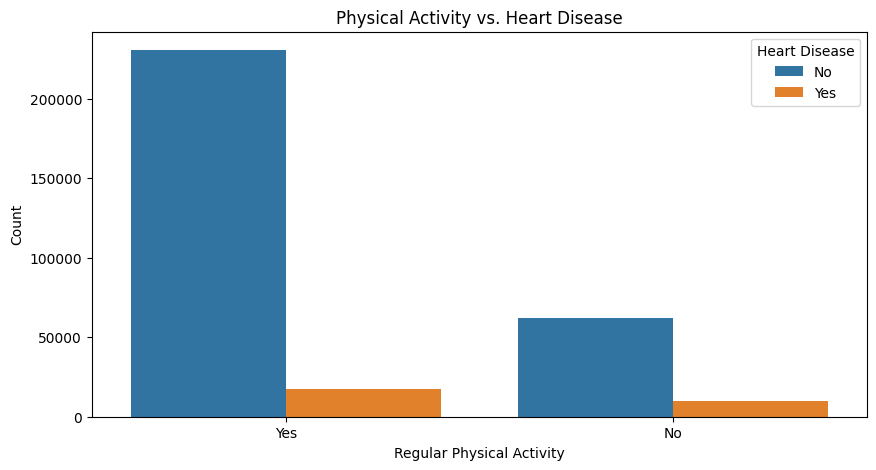

In [4]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="PhysicalActivity", hue="HeartDisease")
plt.title("Physical Activity vs. Heart Disease")
plt.xlabel("Regular Physical Activity")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()


### Distribution of BMI
- This histogram visualizes the distribution of **Body Mass Index (BMI)** in the dataset.

#### Observations:
- The BMI distribution shows a peak around 25–30, indicating that many individuals fall into the **overweight category**.
- A smaller portion of individuals has a BMI above 40, reflecting extreme obesity.

#### Relevance to Question:
- BMI is a known risk factor for heart disease and could confound the relationship between physical activity and heart disease.
- Controlling for BMI in the analysis will help isolate the effect of physical activity on heart disease.


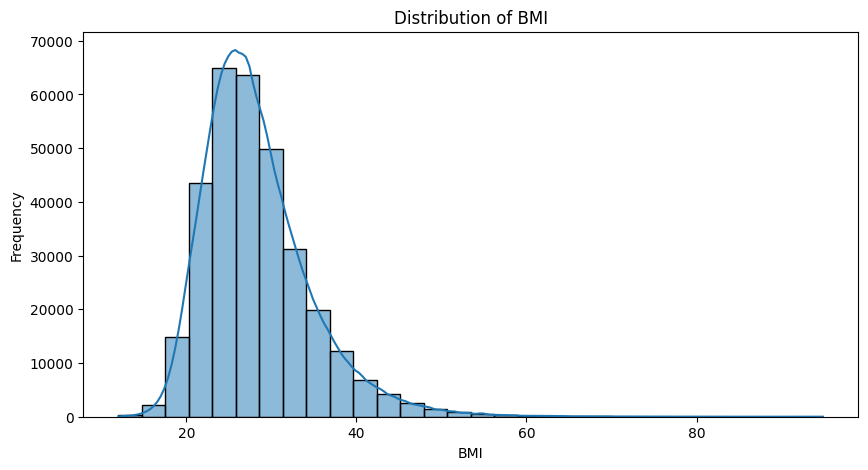

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df["BMI"], kde=True, bins=30)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()


### Distribution of Sleep Time
- This histogram shows the distribution of **Sleep Time** (hours of sleep per day) among individuals in the dataset.

#### Observations:
- The distribution peaks around **7–8 hours**, which aligns with recommended sleep guidelines for most adults.
- A smaller portion of individuals reports sleeping fewer than 5 hours or more than 10 hours per day.

#### Relevance to Question:
- **SleepTime** is a potential confounder because insufficient or excessive sleep is associated with health issues, including heart disease.
- SleepTime may also influence energy levels and the ability to engage in regular physical activity, indirectly affecting heart disease risk.


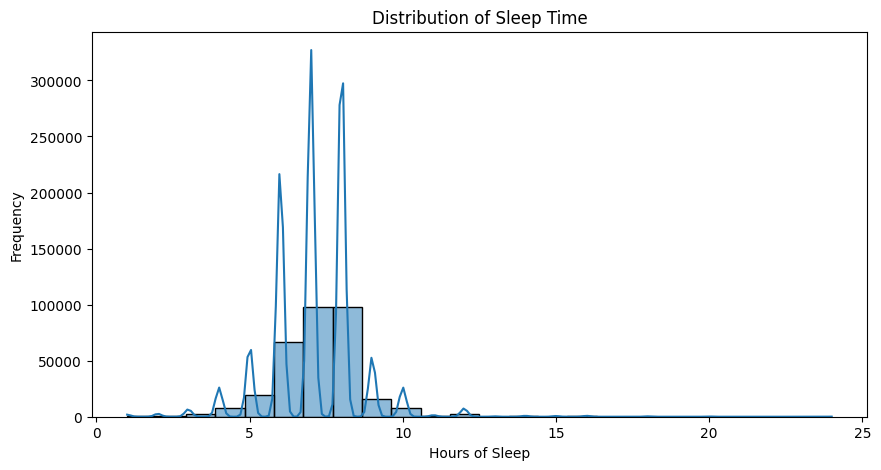

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df["SleepTime"], kde=True, bins=24)
plt.title("Distribution of Sleep Time")
plt.xlabel("Hours of Sleep")
plt.ylabel("Frequency")
plt.show()


### Boxplot of BMI (Outlier Detection)
- This boxplot visualizes the distribution of **Body Mass Index (BMI)** and highlights potential outliers.

#### Observations:
- The central BMI range falls between approximately **20 and 35**, with a median around 28.
- A few outliers with BMI values above 50 are present, indicating extreme obesity.

#### Relevance to Question:
- Identifying BMI outliers is crucial because they may disproportionately influence the relationship between physical activity and heart disease.
- Including or excluding outliers should be considered when analyzing BMI as a confounder in the causal model.


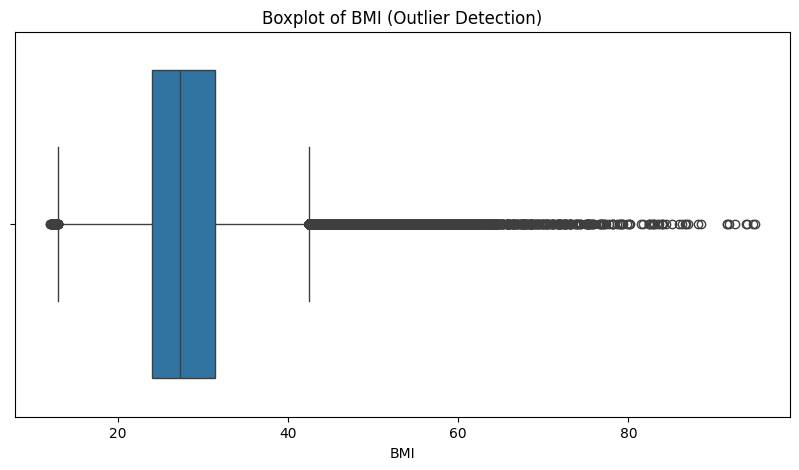

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["BMI"])
plt.title("Boxplot of BMI (Outlier Detection)")
plt.xlabel("BMI")
plt.show()


### Correlation Heatmap of Continuous Variables
- This heatmap visualizes the correlations between key continuous variables: **BMI**, **PhysicalHealth**, **MentalHealth**, and **SleepTime**.

#### Observations:
- A moderate positive correlation (**0.29**) exists between **PhysicalHealth** and **MentalHealth**, suggesting that individuals with poor physical health tend to report poorer mental health.
- Other correlations (e.g., between BMI and SleepTime) are weak or negligible.

#### Relevance to Question:
- Understanding these correlations helps identify potential interactions or dependencies among variables that might confound the relationship between physical activity and heart disease.
- For example:
  - MentalHealth may indirectly influence physical activity levels.
  - BMI and SleepTime are unlikely to strongly influence each other in this dataset, but both should still be considered as confounders in causal analysis.


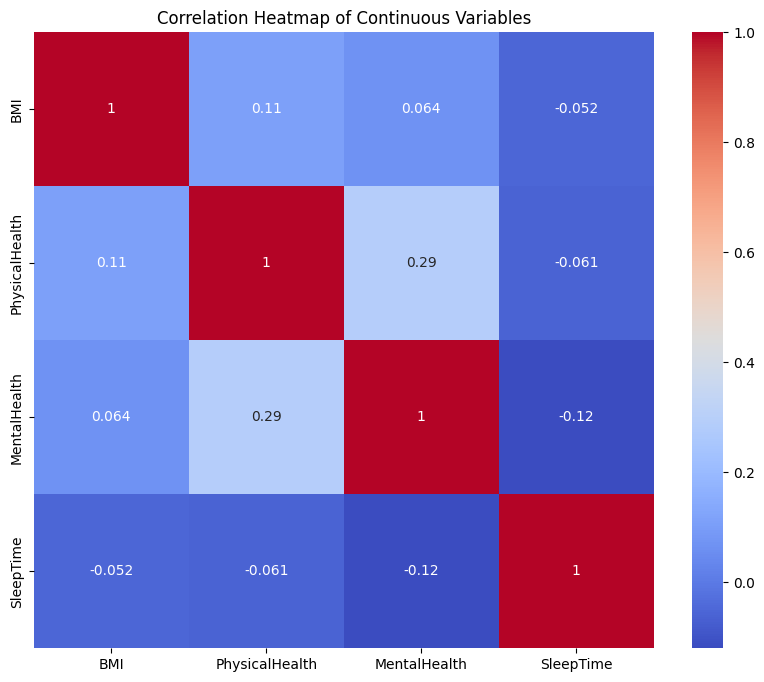

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()


### Distribution of Physical Activity by Age Category
- This stacked histogram shows how **Physical Activity** levels vary across different **Age Categories**.

#### Observations:
- **Younger age groups** (e.g., **18–24**, **25–34**) are more likely to engage in regular physical activity.
- **Older age groups** (e.g., **65+**) have significantly lower levels of physical activity.
- The decline in physical activity levels appears to be consistent as age increases.

#### Relevance to Question:
- **Age** is a critical confounder in the relationship between physical activity and heart disease:
  - Older individuals are more likely to develop heart disease, regardless of their physical activity levels.
  - Adjusting for age in the causal model will help isolate the effect of physical activity on heart disease.


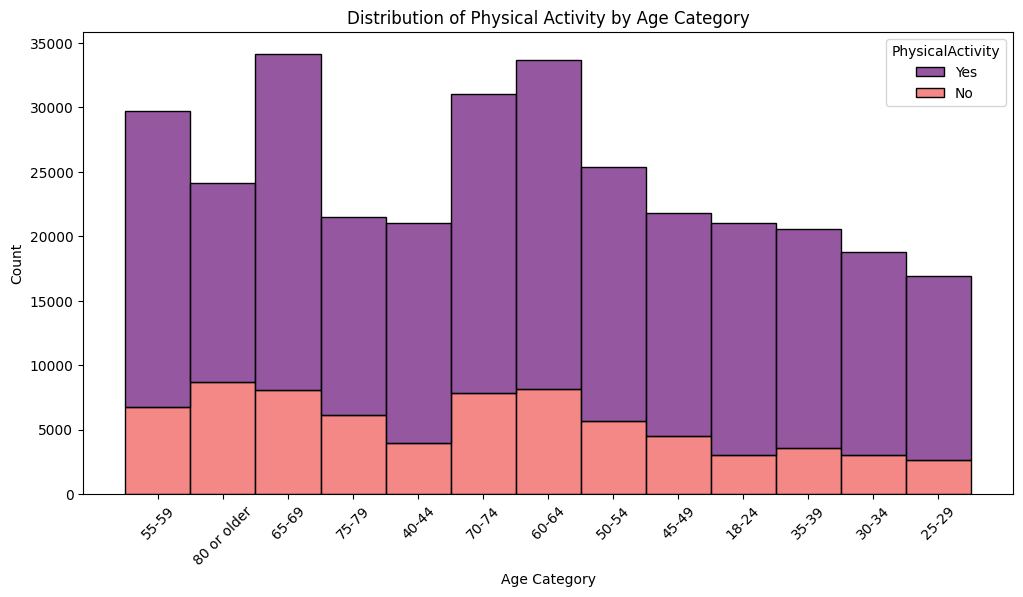

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="AgeCategory", hue="PhysicalActivity", multiple="stack", palette="magma")
plt.title("Distribution of Physical Activity by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### Smoking and Heart Disease
- This bar chart explores the relationship between **Smoking** (potential confounder) and **Heart Disease** (outcome).

#### Observations:
- Smokers are more likely to have heart disease compared to non-smokers, as shown by the higher proportion of heart disease cases among smokers.
- Non-smokers have a lower prevalence of heart disease.

#### Relevance to Question:
- Smoking is a potential confounder in the relationship between physical activity and heart disease.
- Smokers may also engage in lower levels of physical activity, further complicating the analysis.
- This highlights the need to control for smoking when estimating the causal effect of physical activity on heart disease.


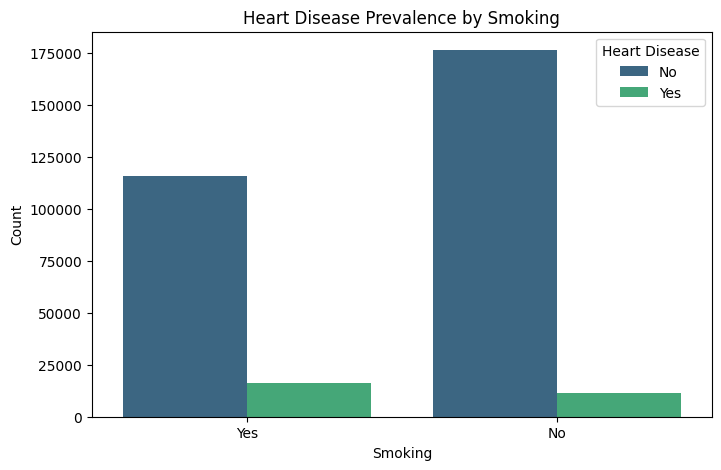

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Smoking", hue="HeartDisease", palette="viridis")
plt.title("Heart Disease Prevalence by Smoking")
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()


### Heart Disease vs. BMI, Sleep Time, and General Health
- This composite figure explores the relationship between **Heart Disease** and three key variables: **BMI**, **SleepTime**, and **GenHealth**.

#### Observations:
1. **Heart Disease vs. BMI:**
   - Individuals with heart disease tend to have slightly higher BMI on average compared to those without heart disease.
   - However, there is considerable overlap between the two groups.

2. **Heart Disease vs. Sleep Time:**
   - The boxplot suggests that individuals with heart disease report slightly lower average sleep time compared to those without heart disease.
   - Outliers with very high or low sleep times are present in both groups.

3. **General Health Distribution:**
   - Individuals with poor or fair general health are more likely to have heart disease.
   - Excellent or very good health is associated with a lower prevalence of heart disease.

#### Relevance to Question:
- **BMI and SleepTime:** These are potential confounders that may influence both physical activity and heart disease risk. Controlling for these variables is critical to isolating the causal effect of physical activity.
- **General Health:** This variable captures a broad assessment of individual well-being, which could mediate the relationship between physical activity and heart disease.


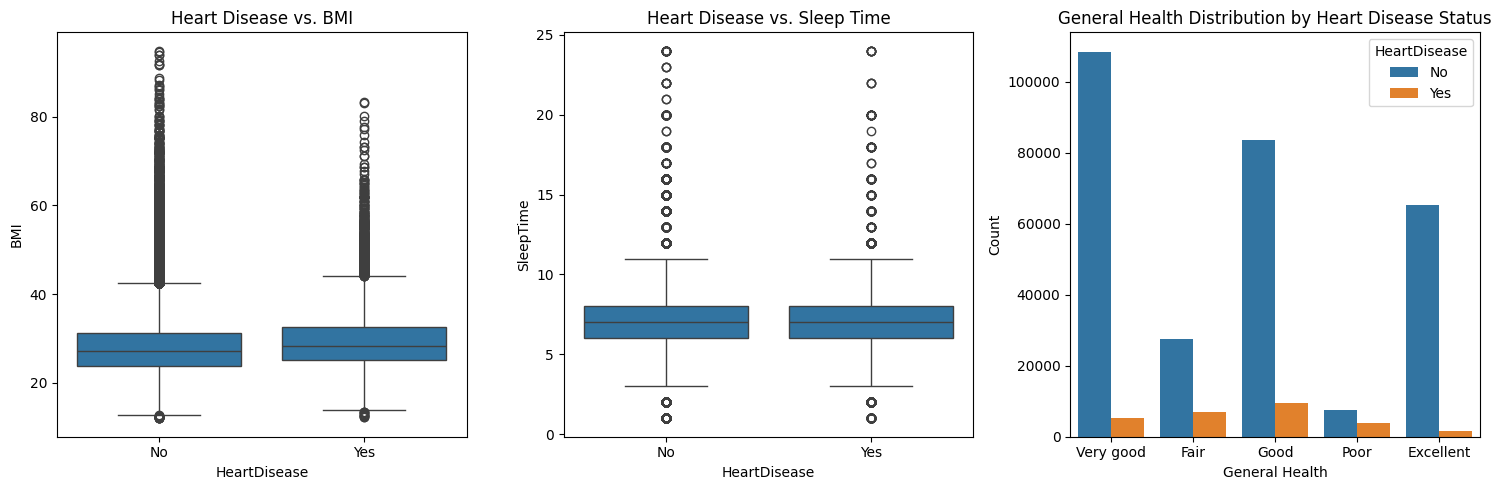

In [11]:
plt.figure(figsize=(15, 5))

# BMI
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="HeartDisease", y="BMI")
plt.title("Heart Disease vs. BMI")

# GenHealth
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="HeartDisease", y="SleepTime")
plt.title("Heart Disease vs. Sleep Time")

# General Health Distribution by Heart Disease Status
plt.subplot(1, 3, 3)
sns.countplot(data=df, x="GenHealth", hue="HeartDisease")
plt.title("General Health Distribution by Heart Disease Status")
plt.xlabel("General Health")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


### Physical Activity by Age Category
- This stacked histogram shows how **Physical Activity** varies across different **Age Categories**.

#### Observations:
- Younger age groups (e.g., **18–24**, **25–34**) have higher levels of physical activity compared to older age groups (e.g., **65+**).
- Physical activity levels decline steadily as age increases, which is expected given that older individuals may face more physical health limitations.

#### Relevance to Question:
- Age is a significant confounder, as older individuals are more likely to have heart disease and also tend to engage in less physical activity.
- Controlling for age is essential to isolate the causal effect of physical activity on heart disease risk.


### Physical Activity General Health
- This figure explores the distribution of **Physical Activity** across  **General Health (GenHealth)**.

#### Observations:

**Physical Activity by General Health:**
   - Individuals reporting **excellent** or **very good health** are more likely to be physically active.
   - Those with **poor** or **fair general health** engage in significantly less physical activity.

#### Relevance to Question:

- **GenHealth:**
  - General health is an important mediator, as better health often enables higher physical activity levels and reduces heart disease risk.
  - Incorporating this variable into the causal model helps clarify the direct effect of physical activity.


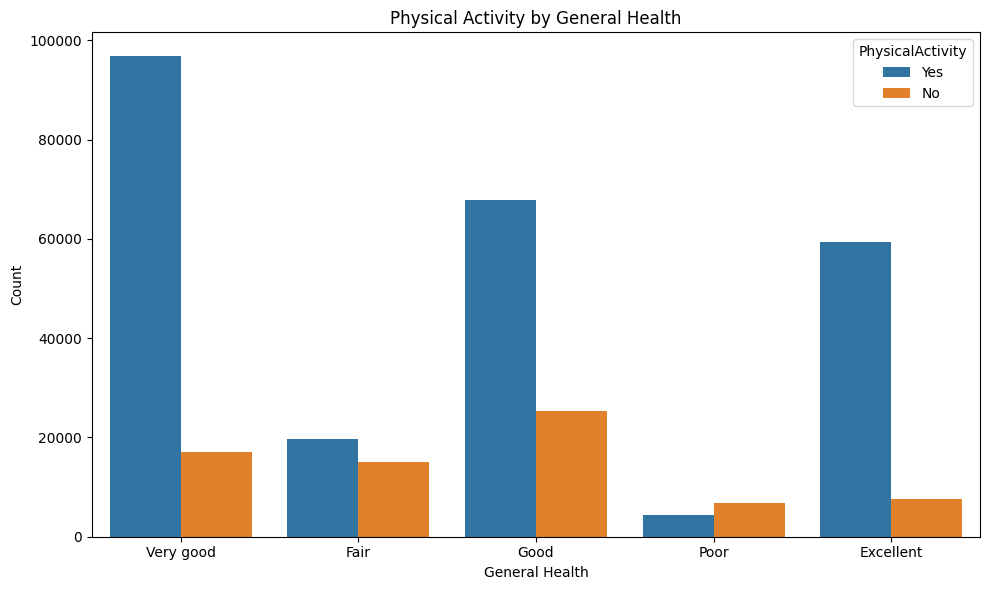

In [12]:
# Physical Activity by General Health
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="GenHealth", hue="PhysicalActivity")
plt.title("Physical Activity by General Health")
plt.xlabel("General Health")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Physical Activity vs. Heart Disease
- This bar chart visualizes the relationship between **Regular Physical Activity** and the prevalence of **Heart Disease**.

#### Observations:
- Individuals who engage in **regular physical activity** are significantly less likely to have heart disease compared to those who are inactive.
- The proportion of individuals with heart disease is much higher among those who do not engage in regular physical activity.

#### Relevance to Question:
- This visualization directly addresses the causal question: *"Does Regular Physical Activity Reduce the Risk of Heart Disease?"*
- It provides strong descriptive evidence supporting the hypothesis that regular physical activity lowers the risk of heart disease.
- Further analysis is needed to control for confounders (e.g., age, BMI, smoking) to establish a causal relationship.


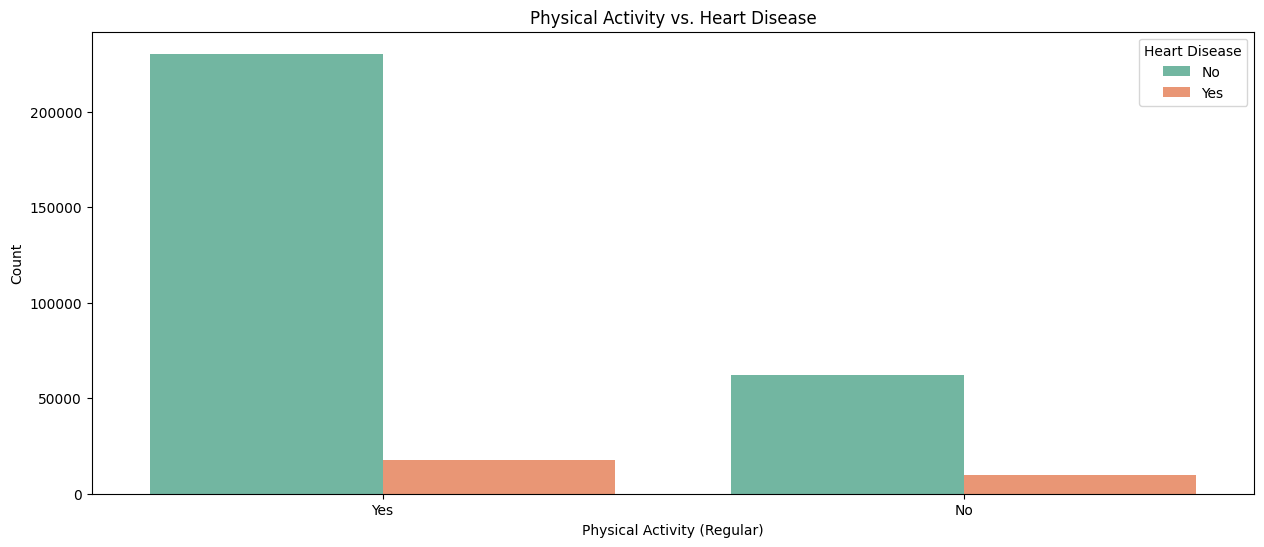

In [13]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="PhysicalActivity", hue="HeartDisease", palette="Set2", dodge=True)
plt.title("Physical Activity vs. Heart Disease")
plt.xlabel("Physical Activity (Regular)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


### Age Categories and Physical Activity Stratified by Heart Disease
- This bar chart examines the relationship between **Age Categories**, **Physical Activity**, and **Heart Disease**.

#### Observations:
- **Heart Disease Prevalence Across Age Categories:**
  - Older age groups (e.g., **65+**) have a significantly higher prevalence of heart disease compared to younger groups (e.g., **18–24**).
  - Younger individuals (e.g., **18–34**) have a lower count of heart disease cases.

- **Age and Physical Activity:**
  - Physical activity levels decline with age, as previously observed. Older individuals are more likely to be both inactive and have heart disease.

#### Relevance to Question:
- **AgeCategory** is a critical confounder in the relationship between physical activity and heart disease:
  - Older age groups are inherently at a higher risk of heart disease and are less likely to engage in physical activity.
  - Adjusting for age in causal analysis is essential to isolate the effect of physical activity on heart disease risk.
- This visualization reinforces the importance of controlling for age when interpreting the impact of physical activity on heart disease.


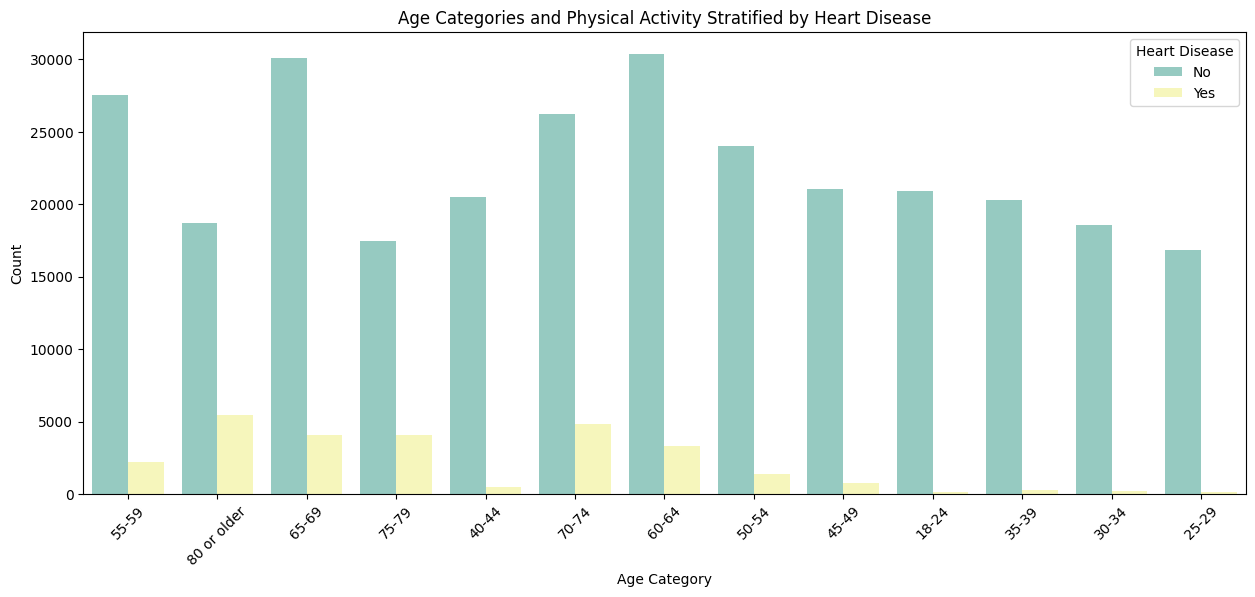

In [14]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="AgeCategory", hue="HeartDisease", palette="Set3")
plt.title("Age Categories and Physical Activity Stratified by Heart Disease")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


### General Health vs. BMI Distribution
- This boxplot illustrates the relationship between **General Health (GenHealth)** and **BMI**.

#### Observations:
- Individuals with **excellent** or **very good general health** tend to have lower BMI, with medians around the normal weight range.
- Higher BMI values are associated with poorer general health categories like **fair** or **poor**, with a wider spread in these groups.

#### Relevance to Question:
- **BMI** is both a potential confounder and a mediator in the relationship between physical activity and heart disease:
  - Poor general health and higher BMI might discourage physical activity, indirectly influencing heart disease risk.
- This visualization highlights the importance of controlling for BMI and general health in the causal analysis of physical activity’s effect on heart disease.


C:\Users\asrit\AppData\Local\Temp\ipykernel_12668\144276715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="GenHealth", y="BMI", palette="pastel")


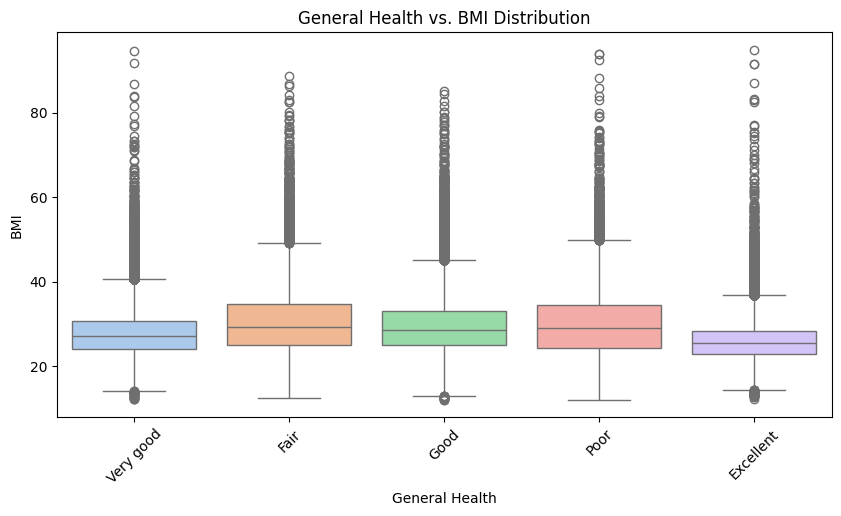

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="GenHealth", y="BMI", palette="pastel")
plt.title("General Health vs. BMI Distribution")
plt.xlabel("General Health")
plt.ylabel("BMI")
plt.xticks(rotation=45)
plt.show()


### BMI vs. Sleep Time Colored by Heart Disease
- This scatter plot examines the relationship between **BMI** and **Sleep Time**, with points colored by **Heart Disease** status.

#### Observations:
- Individuals with heart disease (red points) are scattered across higher BMI ranges compared to those without heart disease.
- Sleep time does not show a strong trend with BMI in either group, though some individuals with very low or very high sleep times appear in the heart disease group.

#### Relevance to Question:
- **BMI** and **Sleep Time** are potential confounders in the relationship between physical activity and heart disease:
  - High BMI and irregular sleep patterns may independently increase heart disease risk while also influencing physical activity levels.
- Controlling for these variables in the causal analysis will ensure that the effect of physical activity on heart disease is not biased by these confounders.


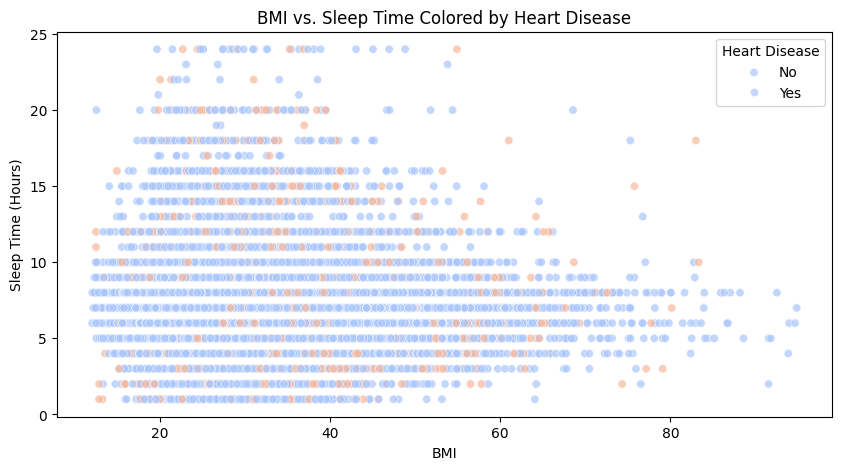

In [16]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="BMI", y="SleepTime", hue="HeartDisease", palette="coolwarm", alpha=0.7)
plt.title("BMI vs. Sleep Time Colored by Heart Disease")
plt.xlabel("BMI")
plt.ylabel("Sleep Time (Hours)")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


In [17]:
# Check the column names in the DataFrame
print(df.columns)


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [18]:
# Check unique values in the PhysicalActivity column
print(df['PhysicalActivity'].unique())


['Yes' 'No']


### Binarizing BMI
This cell creates a binary variable, `Overweight`, based on the BMI values in the dataset. Individuals with a BMI of 25 or greater are classified as overweight (1), while those with a BMI less than 25 are classified as not overweight (0). This transformation helps simplify the analysis of BMI as a risk factor for heart disease.


In [19]:
# Binarizing BMI
df['Overweight'] = (df['BMI'] >= 25).astype(int)

# Display the first few rows to confirm the new column
print(df[['BMI', 'Overweight']].head())


     BMI  Overweight
0  16.60           0
1  20.34           0
2  26.58           1
3  24.21           0
4  23.71           0


### Binarizing Physical Health
In this cell, we create a binary variable, `PoorPhysicalHealth`, based on the number of days individuals reported poor physical health in the past month. A value of 1 indicates that the individual experienced at least one day of poor physical health, while a value of 0 indicates no days of poor physical health. This transformation facilitates the analysis of the impact of physical health on heart disease risk.


In [20]:
# Binarizing Physical Health
df['PoorPhysicalHealth'] = (df['PhysicalHealth'] > 0).astype(int)

# Display the first few rows to confirm the new column
print(df[['PhysicalHealth', 'PoorPhysicalHealth']].head())


   PhysicalHealth  PoorPhysicalHealth
0             3.0                   1
1             0.0                   0
2            20.0                   1
3             0.0                   0
4            28.0                   1


### One-Hot Encoding General Health
This cell applies one-hot encoding to the `GenHealth` variable, transforming it into multiple binary (dummy) variables. Each new column represents a category of general health, allowing for a more granular analysis of how different health statuses relate to heart disease risk. The `drop_first=True` parameter is used to avoid the dummy variable trap by excluding one category.


In [21]:
# One-hot encoding GenHealth
df = pd.get_dummies(df, columns=['GenHealth'], drop_first=True)

# Display the first few rows to confirm the new columns
print(df.head())


  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory  ... SleepTime Asthma  \
0          30.0          No  Female        55-59  ...       5.0    Yes   
1           0.0          No  Female  80 or older  ...       7.0     No   
2          30.0          No    Male        65-69  ...       8.0    Yes   
3           0.0          No  Female        75-79  ...       6.0     No   
4           0.0         Yes  Female        40-44  ...       8.0     No   

  KidneyDisease  SkinCancer Overweight PoorPhysicalHealth GenHealth_Fair  \
0            No         Yes          0        

In [22]:
print(df[['BMI', 'PhysicalActivity']].dtypes)


BMI                 float64
PhysicalActivity     object
dtype: object


### Converting Physical Activity to Binary Numeric Values
This cell transforms the `PhysicalActivity` variable from categorical values ('Yes' and 'No') to binary numeric values (1 for 'Yes' and 0 for 'No'). This conversion facilitates the analysis of the impact of physical activity on heart disease risk. The cell also checks for any NaN values after the conversion to ensure data integrity and confirms the successful changes by displaying the first few rows of the updated column.


In [23]:
# Convert PhysicalActivity to binary numeric values
df['PhysicalActivity'] = df['PhysicalActivity'].map({'Yes': 1, 'No': 0})

# Check for NaN values after conversion
print(df['PhysicalActivity'].isnull().sum())

# Display the first few rows to confirm the changes
print(df[['PhysicalActivity']].head())


0
   PhysicalActivity
0                 1
1                 1
2                 1
3                 0
4                 1


### Creating the Interaction Feature: BMI and Physical Activity
This cell generates an interaction feature called `BMI_PhysicalActivity`, which is the product of the `BMI` and `PhysicalActivity` variables. This interaction term helps to assess whether the effect of physical activity on heart disease risk varies depending on an individual's BMI. The cell concludes by displaying the first few rows to confirm the successful creation of the new column.


In [24]:
# Creating the interaction feature
df['BMI_PhysicalActivity'] = df['BMI'] * df['PhysicalActivity']

# Display the first few rows to confirm the new column
print(df[['BMI', 'PhysicalActivity', 'BMI_PhysicalActivity']].head())


     BMI  PhysicalActivity  BMI_PhysicalActivity
0  16.60                 1                 16.60
1  20.34                 1                 20.34
2  26.58                 1                 26.58
3  24.21                 0                  0.00
4  23.71                 1                 23.71


### One-Hot Encoding Age Category and Creating Interaction Features
This cell applies one-hot encoding to the `AgeCategory` variable, generating binary dummy variables for each age category while dropping the first category to avoid the dummy variable trap. The resulting dummy variables are then concatenated to the original DataFrame. Subsequently, interaction features are created by multiplying each age category dummy variable with the `PhysicalActivity` variable. These interaction terms allow for the examination of how the effect of physical activity on heart disease risk varies across different age categories. The cell concludes by displaying the first few rows of the new interaction columns to confirm their creation.


In [25]:
# One-hot encoding AgeCategory
age_dummies = pd.get_dummies(df['AgeCategory'], prefix='Age', drop_first=True)

# Concatenate the new dummy variables to the original dataframe
df = pd.concat([df, age_dummies], axis=1)

# Creating interaction features for each age category with PhysicalActivity
for col in age_dummies.columns:
    df[f'{col}_PhysicalActivity'] = df[col] * df['PhysicalActivity']

# Display the first few rows to confirm the new columns
print(df.filter(like='_PhysicalActivity').head())


   BMI_PhysicalActivity  Age_25-29_PhysicalActivity  \
0                 16.60                           0   
1                 20.34                           0   
2                 26.58                           0   
3                  0.00                           0   
4                 23.71                           0   

   Age_30-34_PhysicalActivity  Age_35-39_PhysicalActivity  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   Age_40-44_PhysicalActivity  Age_45-49_PhysicalActivity  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0 

### Standardizing Continuous Variables
In this cell, continuous variables including `BMI`, `PhysicalHealth`, `MentalHealth`, and `SleepTime` are standardized using the `StandardScaler`. Standardization transforms these variables to have a mean of 0 and a standard deviation of 1, allowing for a more consistent scale across features. This transformation is crucial for many statistical analyses and modeling techniques, as it helps to eliminate the impact of differing scales on the results. The cell concludes by displaying the first few rows of the standardized features to confirm the scaling process.


In [26]:
from sklearn.preprocessing import StandardScaler


In [27]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of features to standardize
features_to_scale = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']  # Add 'HealthRiskIndex' if created

# Standardizing the features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display the first few rows to confirm the scaling
print(df[features_to_scale].head())


        BMI  PhysicalHealth  MentalHealth  SleepTime
0 -1.844750       -0.046751      3.281069  -1.460354
1 -1.256338       -0.424070     -0.490039  -0.067601
2 -0.274603        2.091388      3.281069   0.628776
3 -0.647473       -0.424070     -0.490039  -0.763977
4 -0.726138        3.097572     -0.490039   0.628776


In [28]:
# Display all column names in the dataframe
print(df.columns)


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Overweight', 'PoorPhysicalHealth',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'BMI_PhysicalActivity', 'Age_25-29', 'Age_30-34',
       'Age_35-39', 'Age_40-44', 'Age_45-49', 'Age_50-54', 'Age_55-59',
       'Age_60-64', 'Age_65-69', 'Age_70-74', 'Age_75-79', 'Age_80 or older',
       'Age_25-29_PhysicalActivity', 'Age_30-34_PhysicalActivity',
       'Age_35-39_PhysicalActivity', 'Age_40-44_PhysicalActivity',
       'Age_45-49_PhysicalActivity', 'Age_50-54_PhysicalActivity',
       'Age_55-59_PhysicalActivity', 'Age_60-64_PhysicalActivity',
       'Age_65-69_PhysicalActivity', 'Age_70-74_PhysicalActivity',
       'Age_75-79_PhysicalActivity', 'Age_80 or older_PhysicalActivity'],
      dt

### Cleaning the Smoking Column and Creating the Health Risk Index
This cell first cleans the `Smoking` column by converting its entries to string type and stripping any leading or trailing whitespace. It then maps the categorical values ('Yes' and 'No') to numeric values (1 for smokers and 0 for non-smokers). After ensuring that the conversion is successful and checking for any NaN values, the cell proceeds to create the `HealthRiskIndex`. This index is calculated by combining the `BMI`, `Smoking`, `GenHealth_Poor`, and `PhysicalActivity` variables, with specific weights assigned to each component. The cell concludes by displaying the first few rows of the relevant variables to confirm the successful creation of the Health Risk Index.


In [29]:
# Clean the Smoking column by converting to string type, if necessary
df['Smoking'] = df['Smoking'].astype(str).str.strip()

# Map Smoking to numeric values
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})

# Check for NaN values after conversion
print("NaN values in Smoking after conversion:", df['Smoking'].isnull().sum())

# If conversion is successful, create the Health Risk Index
df['HealthRiskIndex'] = (
    df['BMI'] +
    df['Smoking'] * 2 +  # Weight of 2 for Smoking
    df['GenHealth_Poor'] * 3 +  # Weight of 3 for Poor General Health
    (1 - df['PhysicalActivity'])  # Inverse of PhysicalActivity
)

# Display the first few rows to confirm the new index
print(df[['BMI', 'Smoking', 'GenHealth_Poor', 'PhysicalActivity', 'HealthRiskIndex']].head())


NaN values in Smoking after conversion: 0
        BMI  Smoking  GenHealth_Poor  PhysicalActivity  HealthRiskIndex
0 -1.844750        1           False                 1         0.155250
1 -1.256338        0           False                 1        -1.256338
2 -0.274603        1           False                 1         1.725397
3 -0.647473        0           False                 0         0.352527
4 -0.726138        0           False                 1        -0.726138


### Distribution of Health Risk Index
This cell plots the distribution of the Health Risk Index using a histogram. The plot includes a kernel density estimate (KDE) to provide a smooth representation of the distribution. Vertical dashed lines represent the mean (in red) and median (in blue) of the Health Risk Index, offering insights into the central tendency of the data. This visualization helps to understand how the Health Risk Index is distributed across individuals and can indicate potential areas of concern regarding health risk.


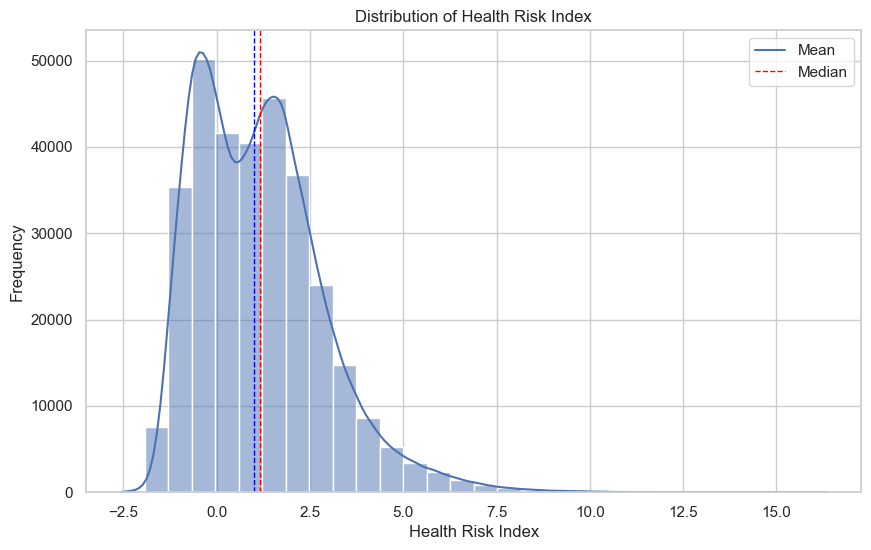

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Plotting the distribution of the Health Risk Index
plt.figure(figsize=(10, 6))
sns.histplot(df['HealthRiskIndex'], bins=30, kde=True)
plt.title('Distribution of Health Risk Index')
plt.xlabel('Health Risk Index')
plt.ylabel('Frequency')
plt.axvline(df['HealthRiskIndex'].mean(), color='red', linestyle='dashed', linewidth=1)  # Mean line
plt.axvline(df['HealthRiskIndex'].median(), color='blue', linestyle='dashed', linewidth=1)  # Median line
plt.legend({'Mean': df['HealthRiskIndex'].mean(), 'Median': df['HealthRiskIndex'].median()})
plt.show()


### Box Plot of Health Risk Index by Heart Disease Status
This cell generates a box plot to compare the distribution of the Health Risk Index between individuals with and without heart disease. The plot visualizes the median, interquartile range (IQR), and any outliers, providing insights into how the Health Risk Index varies based on heart disease status. This visualization is crucial for understanding the potential impact of health risk on heart disease and supports the analysis of the relationship between physical activity and health outcomes.


C:\Users\asrit\AppData\Local\Temp\ipykernel_12668\1047390437.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDisease', y='HealthRiskIndex', palette='Set2')


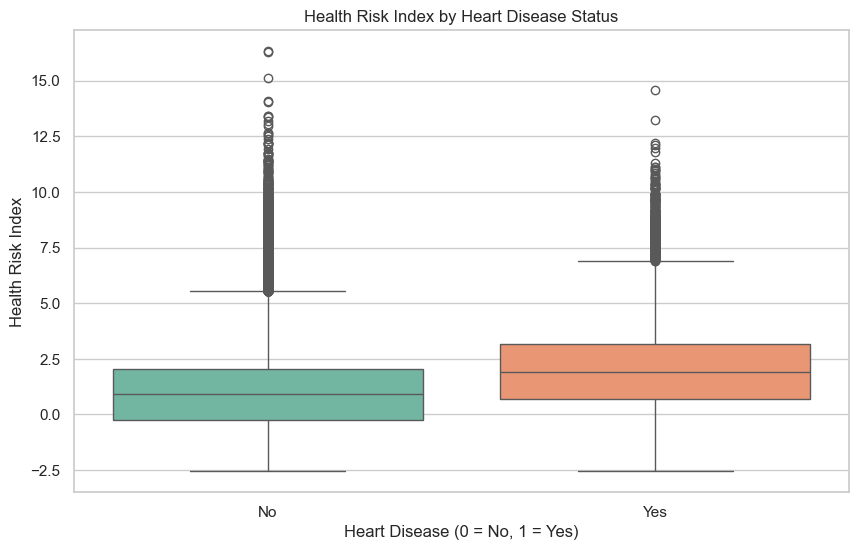

In [31]:
# Set the style for the visualization
sns.set(style="whitegrid")

# Create a box plot for Health Risk Index by Heart Disease status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='HeartDisease', y='HealthRiskIndex', palette='Set2')
plt.title('Health Risk Index by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Health Risk Index')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()
